In [11]:
import sklearn
print(sklearn.__version__)

1.6.1


In [12]:
import pandas as pd
data = pd.read_csv('linear_b_data.csv')
print(data.head())

  symbol_sequence
0        ka-ro-mi
1        ti-ra-ko
2        po-ti-ra
3        ka-ti-mi
4        ro-ka-ti


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 2))
X = vectorizer.fit_transform(data['symbol_sequence'])
print("Feature matrix shape:", X.shape)


Feature matrix shape: (5, 23)


# New Section

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)
data['cluster'] = clusters
print(data)

  symbol_sequence  cluster
0        ka-ro-mi        2
1        ti-ra-ko        0
2        po-ti-ra        0
3        ka-ti-mi        1
4        ro-ka-ti        1


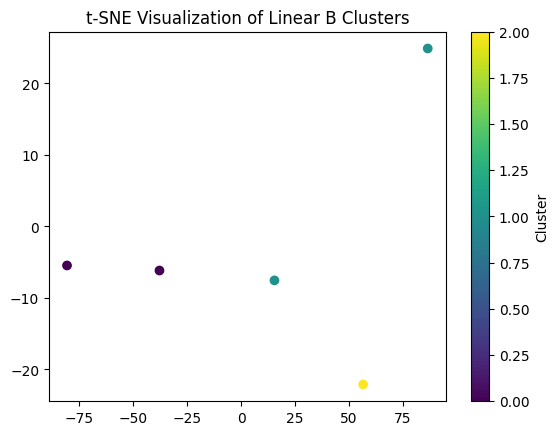

In [15]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
tsne = TSNE(n_components=2, perplexity=2, random_state=42)
X_2d = tsne.fit_transform(X.toarray())
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=clusters, cmap='viridis')
plt.title('t-SNE Visualization of Linear B Clusters')
plt.colorbar(label='Cluster')
plt.show()

In [16]:
import pandas as pd
import random

# Common Linear B-inspired syllables
syllables = ['ka', 'ro', 'mi', 'ti', 'ra', 'ko', 'po', 'ta', 'ni', 'sa']
sequences = []
for _ in range(50):
    # Generate a random sequence of 3-5 syllables
    seq = '-'.join(random.choices(syllables, k=random.randint(3, 5)))
    sequences.append(seq)

# Save to CSV
new_data = pd.DataFrame(sequences, columns=['symbol_sequence'])
new_data.to_csv('linear_b_data_expanded.csv', index=False)
print(new_data.head())

  symbol_sequence
0     sa-sa-po-ni
1  ra-ra-ro-ra-ta
2  mi-ko-ra-ni-mi
3     sa-ni-ni-ti
4     ni-ra-sa-ni


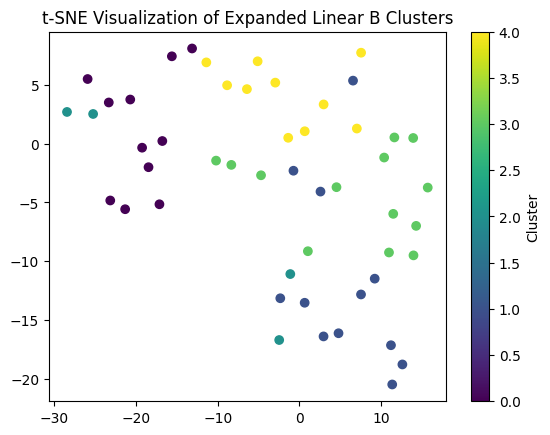

In [17]:
data = pd.read_csv('linear_b_data_expanded.csv')
X = vectorizer.fit_transform(data['symbol_sequence'])
kmeans = KMeans(n_clusters=5, random_state=42)  # Increase clusters for more data
clusters = kmeans.fit_predict(X)
data['cluster'] = clusters
tsne = TSNE(n_components=2, perplexity=10, random_state=42)  # Perplexity < 50
X_2d = tsne.fit_transform(X.toarray())
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=clusters, cmap='viridis')
plt.title('t-SNE Visualization of Expanded Linear B Clusters')
plt.colorbar(label='Cluster')
plt.show()